Import pkgs

In [32]:
import numpy as np
import matplotlib.pyplot as plt

Create Dataset

[[ 1  3]
 [-3  4]
 [-7 10]]
[[[ 4.  0.]
  [ 0.  2.]]

 [[10.  0.]
  [ 0.  5.]]

 [[ 9.  0.]
  [ 0.  1.]]]


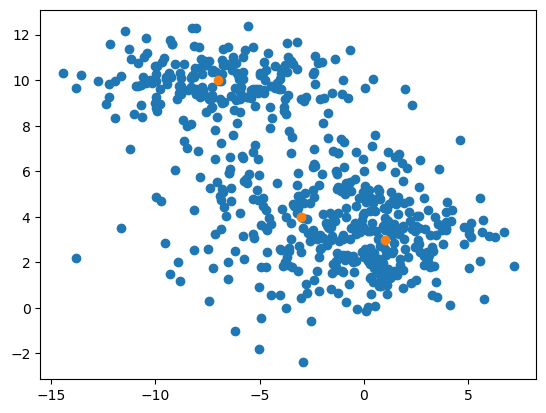

In [33]:
n = 200 # sample per class
dim = 2 # dimesions
K = 3   # num of clusters

mu_true = np.random.randint(-10, 11, (K, 2))
sigma_true = np.array([np.identity(dim) * np.random.randint(1, 11, dim) for k in range(K)])
data = np.vstack([np.reshape(np.random.multivariate_normal(mean, cov, n), (n, dim, 1)) for mean, cov in zip(mu_true, sigma_true)])

np.random.shuffle(data)
print(mu_true)
print(sigma_true)
data = np.array([[d[0][0], d[1][0]]for d in data])
plt.scatter(data[:,0], data[:,1])
plt.scatter(mu_true[:,0], mu_true[:,1])

In [50]:
import numpy as np

class GMM():
    def __init__(self, data, k = 2, tol = 1e-4):
        self.K = k
        self.data = data
        self.tol = tol
        self.initialize()

    def initialize(self):
        data = self.data
        self.N = len(data)
        pi = np.repeat(1/self.K, self.K)
        mu_array = np.array([data[np.random.choice(len(data), replace=False)] for _ in range(self.K)])
        sigma_array = np.array([np.eye(data.shape[1]) for _ in range(self.K)])
        r = np.ones(shape=(len(data), self.K))
        r /= self.K
        self.mu_array = mu_array
        self.sigma_array = sigma_array
        self.pi = pi
        self.r = r

    def pdf(self, X, mu, sigma):
        d = len(X)
        norm_coeff = 1.0 / np.sqrt((2 * np.pi)**d * np.linalg.det(sigma))
        inv = np.linalg.inv(sigma)
        dev = X - mu
        exponent = -0.5 * np.dot(np.dot(dev.T, inv), dev)
        return norm_coeff * np.exp(exponent)

    def EM_fit(self, max_iters=100):
        log_likelihoods = []
        for i in range(max_iters):
            # E step
            for j in range(self.N):
                pdf_vals = np.array([self.pdf(self.data[j], self.mu_array[k], self.sigma_array[k])
                                     for k in range(self.K)])
                self.r[j, :] = self.pi * pdf_vals / np.sum(self.pi * pdf_vals)
            
            # M step
            self.pi = np.sum(self.r, axis=0) / self.N
            for k in range(self.K):
                self.mu_array[k] = np.sum(self.r[:, k].reshape(-1, 1) * self.data, axis=0) / np.sum(self.r[:, k])
                dev = self.data - self.mu_array[k]
                self.sigma_array[k] = (dev.T * self.r[:, k]).dot(dev) / np.sum(self.r[:, k])
                
    def predict(self, X):
        pdf_vals = np.array([[self.pdf(X[i], self.mu_array[k], self.sigma_array[k]) for k in range(self.K)] for i in range(self.N)])
        cluster_probs = self.pi * pdf_vals
        return np.argmax(cluster_probs, axis=1)

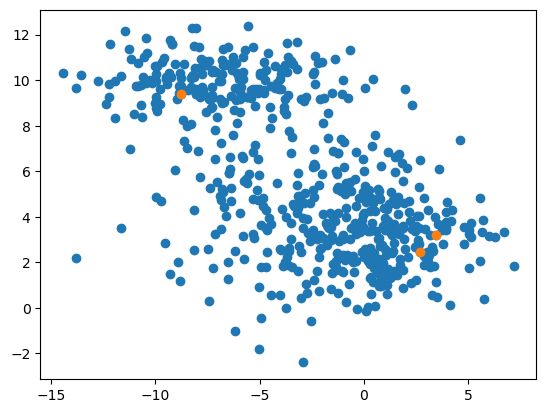

In [51]:
gmm = GMM(data, 3)
plt.scatter(data[:,0], data[:,1])
plt.scatter(gmm.mu_array[:,0], gmm.mu_array[:,1])

In [52]:
gmm.EM_fit(max_iters=100)

[[ 1  3]
 [-3  4]
 [-7 10]]
[[[ 4.  0.]
  [ 0.  2.]]

 [[10.  0.]
  [ 0.  5.]]

 [[ 9.  0.]
  [ 0.  1.]]]
[[-3.05594092  4.41490164]
 [ 0.97085967  2.9074798 ]
 [-6.95620566  9.98991541]]
[[[11.86317167  0.0503027 ]
  [ 0.0503027   5.39880509]]

 [[ 5.00572408  0.14847318]
  [ 0.14847318  1.66176551]]

 [[ 8.72056759 -0.08929321]
  [-0.08929321  0.85826239]]]


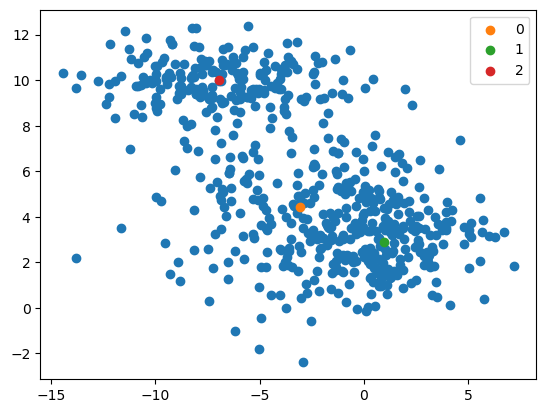

In [53]:
plt.scatter(data[:,0], data[:,1])
for k in range(K):
    plt.scatter(gmm.mu_array[k,0], gmm.mu_array[k,1], label=k)
print(mu_true)
print(sigma_true)
print(gmm.mu_array)
print(gmm.sigma_array)
plt.legend()
plt.show()

In [54]:
y = gmm.predict(data)

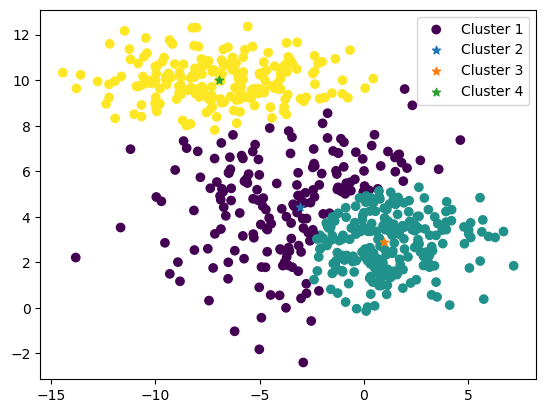

In [65]:

plt.scatter(data[:,0], data[:,1], c=y)
for k in range(K):
    plt.scatter(gmm.mu_array[k,0], gmm.mu_array[k,1], marker='*')
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Centroids'])
plt.show()